In [84]:
import tqdm
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist

In [85]:
random.seed(42)
np.random.seed(42)

In [86]:
data = pd.read_csv('dataNum.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Train Data Shape:  (60000, 28, 28) (60000,)
Test Data Shape:  (10000, 28, 28) (10000,)

Classes:  10
[0 1 2 3 4 5 6 7 8 9]
1


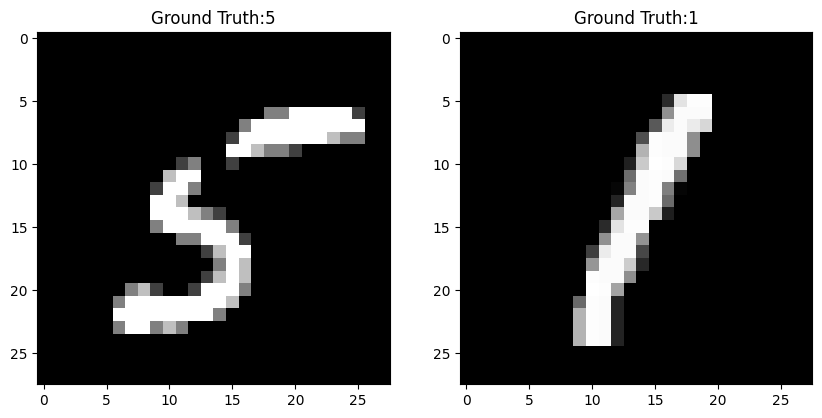

In [87]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Train Data Shape: ", train_images.shape, train_labels.shape)
print("Test Data Shape: ", test_images.shape, test_labels.shape)

classes=np.unique(train_labels)
print("\nClasses: ", len(classes))
print(classes)

plt.figure(figsize=[10,5])

plt.subplot(121)
plt.imshow(train_images[47,:,:], cmap='gray')
plt.title("Ground Truth:"+str(train_labels[47]))

plt.subplot(122)
plt.imshow(train_images[77,:,:], cmap='gray')
plt.title("Ground Truth:"+str(train_labels[77]))

print(train_labels[77].T)

In [88]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) 

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

print(data_dev.shape)
print(data_dev[8].shape)

(785, 1000)
(1000,)


In [89]:
Y_train

array([2, 6, 4, ..., 2, 6, 0])

**Forward propagation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

**Vars and shapes**

Forward prop

- $A^{[0]} = X$: 784 x m
- $Z^{[1]} \sim A^{[1]}$: 10 x m
- $W^{[1]}$: 10 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $B^{[1]}$: 10 x 1
- $Z^{[2]} \sim A^{[2]}$: 10 x m
- $W^{[1]}$: 10 x 10 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
- $B^{[2]}$: 10 x 1

Backprop

- $dZ^{[2]}$: 10 x m ($~A^{[2]}$)
- $dW^{[2]}$: 10 x 10
- $dB^{[2]}$: 10 x 1
- $dZ^{[1]}$: 10 x m ($~A^{[1]}$)
- $dW^{[1]}$: 10 x 10
- $dB^{[1]}$: 10 x 1

In [90]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [91]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [92]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [93]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [94]:
def ReLU_deriv(Z):
    return Z > 0

In [95]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [96]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [97]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [98]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [99]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in tqdm.trange(iterations, colour = "red"):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 1 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [100]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 450)

  0%|          | 1/450 [00:00<06:39,  1.13it/s]

Iteration:  0
[0 2 0 ... 1 2 1] [2 6 4 ... 2 6 0]
0.08734146341463414


  0%|          | 2/450 [00:01<04:33,  1.64it/s]

Iteration:  1
[0 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.10958536585365854


  1%|          | 3/450 [00:01<03:50,  1.94it/s]

Iteration:  2
[0 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.12739024390243903


  1%|          | 4/450 [00:03<07:07,  1.04it/s]

Iteration:  3
[0 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.14314634146341462


  1%|          | 5/450 [00:03<05:51,  1.27it/s]

Iteration:  4
[0 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.15678048780487805


  1%|▏         | 6/450 [00:05<08:15,  1.12s/it]

Iteration:  5
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.16851219512195123


  2%|▏         | 7/450 [00:06<06:59,  1.06it/s]

Iteration:  6
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.1784390243902439


  2%|▏         | 8/450 [00:06<05:42,  1.29it/s]

Iteration:  7
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.18660975609756097


  2%|▏         | 9/450 [00:07<06:54,  1.06it/s]

Iteration:  8
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.19485365853658537


  2%|▏         | 10/450 [00:08<05:52,  1.25it/s]

Iteration:  9
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.2022439024390244


  2%|▏         | 11/450 [00:09<07:25,  1.02s/it]

Iteration:  10
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.2081951219512195


  3%|▎         | 12/450 [00:11<07:42,  1.06s/it]

Iteration:  11
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.21429268292682926


  3%|▎         | 13/450 [00:11<06:21,  1.15it/s]

Iteration:  12
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.22004878048780488


  3%|▎         | 14/450 [00:12<05:47,  1.25it/s]

Iteration:  13
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.22504878048780488


  3%|▎         | 15/450 [00:13<06:25,  1.13it/s]

Iteration:  14
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.22987804878048781


  4%|▎         | 16/450 [00:13<05:13,  1.38it/s]

Iteration:  15
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.23456097560975608


  4%|▍         | 17/450 [00:14<04:41,  1.54it/s]

Iteration:  16
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.23892682926829267


  4%|▍         | 18/450 [00:14<04:46,  1.51it/s]

Iteration:  17
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.2446341463414634


  4%|▍         | 19/450 [00:15<05:09,  1.39it/s]

Iteration:  18
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.24926829268292683


  4%|▍         | 20/450 [00:16<05:09,  1.39it/s]

Iteration:  19
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.2539268292682927


  5%|▍         | 21/450 [00:16<04:17,  1.66it/s]

Iteration:  20
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.2582439024390244


  5%|▍         | 22/450 [00:17<04:10,  1.71it/s]

Iteration:  21
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.26378048780487806


  5%|▌         | 23/450 [00:17<04:29,  1.59it/s]

Iteration:  22
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.26934146341463416


  5%|▌         | 24/450 [00:18<03:54,  1.82it/s]

Iteration:  23
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.2745365853658537


  6%|▌         | 25/450 [00:19<04:20,  1.63it/s]

Iteration:  24
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.2798536585365854


  6%|▌         | 26/450 [00:20<07:02,  1.00it/s]

Iteration:  25
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.2851463414634146


  6%|▌         | 27/450 [00:21<07:04,  1.00s/it]

Iteration:  26
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.2898780487804878


  6%|▌         | 28/450 [00:22<06:09,  1.14it/s]

Iteration:  27
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.2945853658536585


  6%|▋         | 29/450 [00:23<05:46,  1.21it/s]

Iteration:  28
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.2995853658536585


  7%|▋         | 30/450 [00:23<05:40,  1.23it/s]

Iteration:  29
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.30465853658536585


  7%|▋         | 31/450 [00:25<06:18,  1.11it/s]

Iteration:  30
[2 2 7 ... 8 2 0] [2 6 4 ... 2 6 0]
0.3090731707317073


  7%|▋         | 32/450 [00:26<06:59,  1.00s/it]

Iteration:  31
[2 2 7 ... 7 2 0] [2 6 4 ... 2 6 0]
0.3134390243902439


  7%|▋         | 33/450 [00:27<07:13,  1.04s/it]

Iteration:  32
[2 6 7 ... 7 2 0] [2 6 4 ... 2 6 0]
0.31814634146341464


  8%|▊         | 34/450 [00:28<06:28,  1.07it/s]

Iteration:  33
[2 6 9 ... 7 2 0] [2 6 4 ... 2 6 0]
0.3224390243902439


  8%|▊         | 35/450 [00:28<06:15,  1.11it/s]

Iteration:  34
[2 6 9 ... 7 2 0] [2 6 4 ... 2 6 0]
0.32782926829268294


  8%|▊         | 36/450 [00:30<07:47,  1.13s/it]

Iteration:  35
[2 6 9 ... 7 2 0] [2 6 4 ... 2 6 0]
0.33270731707317075


  8%|▊         | 37/450 [00:32<09:08,  1.33s/it]

Iteration:  36
[2 6 9 ... 7 2 0] [2 6 4 ... 2 6 0]
0.3370487804878049


  8%|▊         | 38/450 [00:33<09:11,  1.34s/it]

Iteration:  37
[2 6 9 ... 7 2 0] [2 6 4 ... 2 6 0]
0.34095121951219515


  9%|▊         | 39/450 [00:34<07:44,  1.13s/it]

Iteration:  38
[2 6 9 ... 7 2 0] [2 6 4 ... 2 6 0]
0.34485365853658534


  9%|▉         | 40/450 [00:35<06:35,  1.04it/s]

Iteration:  39
[2 6 9 ... 7 2 0] [2 6 4 ... 2 6 0]
0.3484390243902439


  9%|▉         | 41/450 [00:36<08:21,  1.23s/it]

Iteration:  40
[2 6 9 ... 7 2 0] [2 6 4 ... 2 6 0]
0.35153658536585364


  9%|▉         | 42/450 [00:37<07:19,  1.08s/it]

Iteration:  41
[2 6 9 ... 7 2 0] [2 6 4 ... 2 6 0]
0.35521951219512193


 10%|▉         | 43/450 [00:38<06:31,  1.04it/s]

Iteration:  42
[2 6 9 ... 7 2 0] [2 6 4 ... 2 6 0]
0.35897560975609755


 10%|▉         | 44/450 [00:38<05:41,  1.19it/s]

Iteration:  43
[2 6 9 ... 7 2 0] [2 6 4 ... 2 6 0]
0.363


 10%|█         | 45/450 [00:40<06:46,  1.00s/it]

Iteration:  44
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.36658536585365853


 10%|█         | 46/450 [00:40<05:54,  1.14it/s]

Iteration:  45
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.3702682926829268


 10%|█         | 47/450 [00:41<06:07,  1.10it/s]

Iteration:  46
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.3748048780487805


 11%|█         | 48/450 [00:42<06:03,  1.11it/s]

Iteration:  47
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.3785609756097561


 11%|█         | 49/450 [00:43<05:25,  1.23it/s]

Iteration:  48
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.3827317073170732


 11%|█         | 50/450 [00:44<06:53,  1.03s/it]

Iteration:  49
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.3868536585365854


 11%|█▏        | 51/450 [00:45<05:25,  1.22it/s]

Iteration:  50
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.3916829268292683


 12%|█▏        | 52/450 [00:45<04:52,  1.36it/s]

Iteration:  51
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.3957317073170732


 12%|█▏        | 53/450 [00:46<04:21,  1.52it/s]

Iteration:  52
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.40051219512195124


 12%|█▏        | 54/450 [00:47<05:13,  1.26it/s]

Iteration:  53
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.40431707317073173


 12%|█▏        | 55/450 [00:47<04:58,  1.32it/s]

Iteration:  54
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.4089024390243902


 12%|█▏        | 56/450 [00:48<05:14,  1.25it/s]

Iteration:  55
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.4131463414634146


 13%|█▎        | 57/450 [00:49<04:39,  1.41it/s]

Iteration:  56
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.41748780487804876


 13%|█▎        | 58/450 [00:49<04:12,  1.55it/s]

Iteration:  57
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.4220243902439024


 13%|█▎        | 59/450 [00:50<03:34,  1.82it/s]

Iteration:  58
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.4265853658536585


 13%|█▎        | 60/450 [00:50<03:43,  1.74it/s]

Iteration:  59
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.43160975609756097


 14%|█▎        | 61/450 [00:52<06:09,  1.05it/s]

Iteration:  60
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.43685365853658537


 14%|█▍        | 62/450 [00:53<05:38,  1.15it/s]

Iteration:  61
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.4412439024390244


 14%|█▍        | 63/450 [00:54<05:23,  1.20it/s]

Iteration:  62
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.44558536585365854


 14%|█▍        | 64/450 [00:54<04:20,  1.48it/s]

Iteration:  63
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.4497560975609756


 14%|█▍        | 65/450 [00:54<04:10,  1.53it/s]

Iteration:  64
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.4547560975609756


 15%|█▍        | 66/450 [00:55<04:10,  1.53it/s]

Iteration:  65
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.458609756097561


 15%|█▍        | 67/450 [00:56<03:40,  1.74it/s]

Iteration:  66
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.46246341463414636


 15%|█▌        | 68/450 [00:56<03:42,  1.72it/s]

Iteration:  67
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.4667317073170732


 15%|█▌        | 69/450 [00:57<04:37,  1.37it/s]

Iteration:  68
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.47085365853658534


 16%|█▌        | 70/450 [00:59<06:28,  1.02s/it]

Iteration:  69
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.47473170731707315


 16%|█▌        | 71/450 [01:01<08:15,  1.31s/it]

Iteration:  70
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.47853658536585364


 16%|█▌        | 72/450 [01:03<09:58,  1.58s/it]

Iteration:  71
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.4826829268292683


 16%|█▌        | 73/450 [01:04<09:15,  1.47s/it]

Iteration:  72
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.486390243902439


 16%|█▋        | 74/450 [01:06<09:59,  1.59s/it]

Iteration:  73
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.49078048780487804


 17%|█▋        | 75/450 [01:09<12:15,  1.96s/it]

Iteration:  74
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.4945609756097561


 17%|█▋        | 76/450 [01:10<10:31,  1.69s/it]

Iteration:  75
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.49821951219512195


 17%|█▋        | 77/450 [01:11<08:49,  1.42s/it]

Iteration:  76
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.5018048780487805


 17%|█▋        | 78/450 [01:12<08:34,  1.38s/it]

Iteration:  77
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.505780487804878


 18%|█▊        | 79/450 [01:13<07:43,  1.25s/it]

Iteration:  78
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.5093414634146342


 18%|█▊        | 80/450 [01:14<06:21,  1.03s/it]

Iteration:  79
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.5127317073170732


 18%|█▊        | 81/450 [01:15<06:07,  1.01it/s]

Iteration:  80
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.5158536585365854


 18%|█▊        | 82/450 [01:15<05:38,  1.09it/s]

Iteration:  81
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.5194146341463415


 18%|█▊        | 83/450 [01:16<05:23,  1.13it/s]

Iteration:  82
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.5222439024390244


 19%|█▊        | 84/450 [01:17<06:17,  1.03s/it]

Iteration:  83
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.525609756097561


 19%|█▉        | 85/450 [01:19<06:31,  1.07s/it]

Iteration:  84
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.5286341463414634


 19%|█▉        | 86/450 [01:19<05:38,  1.08it/s]

Iteration:  85
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.532219512195122


 19%|█▉        | 87/450 [01:20<05:09,  1.17it/s]

Iteration:  86
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.534829268292683


 20%|█▉        | 88/450 [01:21<04:57,  1.22it/s]

Iteration:  87
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.5377317073170732


 20%|█▉        | 89/450 [01:21<04:45,  1.26it/s]

Iteration:  88
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.5407560975609756


 20%|██        | 90/450 [01:22<04:55,  1.22it/s]

Iteration:  89
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.5438048780487805


 20%|██        | 91/450 [01:23<05:42,  1.05it/s]

Iteration:  90
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.5463658536585366


 20%|██        | 92/450 [01:25<05:56,  1.00it/s]

Iteration:  91
[2 6 9 ... 5 2 0] [2 6 4 ... 2 6 0]
0.5489756097560976


 21%|██        | 93/450 [01:25<05:35,  1.06it/s]

Iteration:  92
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.5512926829268293


 21%|██        | 94/450 [01:27<07:29,  1.26s/it]

Iteration:  93
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.5545121951219513


 21%|██        | 95/450 [01:29<07:30,  1.27s/it]

Iteration:  94
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.5568048780487805


 21%|██▏       | 96/450 [01:29<05:56,  1.01s/it]

Iteration:  95
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.5591951219512196


 22%|██▏       | 97/450 [01:30<04:53,  1.20it/s]

Iteration:  96
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.5622682926829269


 22%|██▏       | 98/450 [01:30<04:04,  1.44it/s]

Iteration:  97
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.5649024390243902


 22%|██▏       | 99/450 [01:31<04:07,  1.42it/s]

Iteration:  98
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.567560975609756


 22%|██▏       | 100/450 [01:31<03:24,  1.71it/s]

Iteration:  99
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.5696097560975609


 22%|██▏       | 101/450 [01:32<03:38,  1.60it/s]

Iteration:  100
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.5719756097560975


 23%|██▎       | 102/450 [01:32<03:08,  1.85it/s]

Iteration:  101
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.5741219512195121


 23%|██▎       | 103/450 [01:33<03:21,  1.72it/s]

Iteration:  102
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.5768292682926829


 23%|██▎       | 104/450 [01:33<03:47,  1.52it/s]

Iteration:  103
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.578390243902439


 23%|██▎       | 105/450 [01:34<04:22,  1.31it/s]

Iteration:  104
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.5810243902439024


 24%|██▎       | 106/450 [01:35<04:14,  1.35it/s]

Iteration:  105
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.5832926829268292


 24%|██▍       | 107/450 [01:36<04:37,  1.24it/s]

Iteration:  106
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.5857560975609756


 24%|██▍       | 108/450 [01:38<05:54,  1.04s/it]

Iteration:  107
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.5879756097560975


 24%|██▍       | 109/450 [01:39<06:22,  1.12s/it]

Iteration:  108
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.5902195121951219


 24%|██▍       | 110/450 [01:40<05:41,  1.01s/it]

Iteration:  109
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.592609756097561


 25%|██▍       | 111/450 [01:40<04:52,  1.16it/s]

Iteration:  110
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.5945609756097561


 25%|██▍       | 112/450 [01:41<04:37,  1.22it/s]

Iteration:  111
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.5962195121951219


 25%|██▌       | 113/450 [01:42<04:07,  1.36it/s]

Iteration:  112
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.598390243902439


 25%|██▌       | 114/450 [01:43<05:12,  1.08it/s]

Iteration:  113
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.6003658536585366


 26%|██▌       | 115/450 [01:45<06:46,  1.21s/it]

Iteration:  114
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.6025121951219512


 26%|██▌       | 116/450 [01:46<07:05,  1.27s/it]

Iteration:  115
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.6044878048780488


 26%|██▌       | 117/450 [01:48<07:47,  1.41s/it]

Iteration:  116
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.6064634146341463


 26%|██▌       | 118/450 [01:50<08:10,  1.48s/it]

Iteration:  117
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.6087560975609756


 26%|██▋       | 119/450 [01:50<06:58,  1.26s/it]

Iteration:  118
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.6112682926829268


 27%|██▋       | 120/450 [01:51<06:14,  1.13s/it]

Iteration:  119
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.613390243902439


 27%|██▋       | 121/450 [01:52<05:39,  1.03s/it]

Iteration:  120
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.6154634146341463


 27%|██▋       | 122/450 [01:52<04:26,  1.23it/s]

Iteration:  121
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.6169024390243902


 27%|██▋       | 123/450 [01:53<04:19,  1.26it/s]

Iteration:  122
[2 6 9 ... 4 2 0] [2 6 4 ... 2 6 0]
0.6186829268292683


 28%|██▊       | 124/450 [01:54<04:00,  1.36it/s]

Iteration:  123
[2 6 4 ... 4 2 0] [2 6 4 ... 2 6 0]
0.6202926829268293


 28%|██▊       | 125/450 [01:54<03:51,  1.40it/s]

Iteration:  124
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6220975609756098


 28%|██▊       | 126/450 [01:55<03:10,  1.70it/s]

Iteration:  125
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6234634146341463


 28%|██▊       | 127/450 [01:55<03:05,  1.74it/s]

Iteration:  126
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6252926829268293


 28%|██▊       | 128/450 [01:55<02:42,  1.98it/s]

Iteration:  127
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6272439024390244


 29%|██▊       | 129/450 [01:57<03:37,  1.48it/s]

Iteration:  128
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6291219512195122


 29%|██▉       | 130/450 [01:59<05:58,  1.12s/it]

Iteration:  129
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6310731707317073


 29%|██▉       | 131/450 [02:00<06:35,  1.24s/it]

Iteration:  130
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6332439024390244


 29%|██▉       | 132/450 [02:01<05:02,  1.05it/s]

Iteration:  131
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6347560975609756


 30%|██▉       | 133/450 [02:01<04:21,  1.21it/s]

Iteration:  132
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6364390243902439


 30%|██▉       | 134/450 [02:02<03:49,  1.38it/s]

Iteration:  133
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6385609756097561


 30%|███       | 135/450 [02:03<04:21,  1.20it/s]

Iteration:  134
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6401219512195122


 30%|███       | 136/450 [02:04<04:41,  1.11it/s]

Iteration:  135
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6421707317073171


 30%|███       | 137/450 [02:05<05:12,  1.00it/s]

Iteration:  136
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6435853658536586


 31%|███       | 138/450 [02:05<04:28,  1.16it/s]

Iteration:  137
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6451463414634147


 31%|███       | 139/450 [02:06<03:44,  1.38it/s]

Iteration:  138
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6464878048780488


 31%|███       | 140/450 [02:07<05:03,  1.02it/s]

Iteration:  139
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6479756097560976


 31%|███▏      | 141/450 [02:08<04:11,  1.23it/s]

Iteration:  140
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6490487804878049


 32%|███▏      | 142/450 [02:09<05:23,  1.05s/it]

Iteration:  141
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6505121951219512


 32%|███▏      | 143/450 [02:10<05:07,  1.00s/it]

Iteration:  142
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6521951219512195


 32%|███▏      | 144/450 [02:11<04:29,  1.14it/s]

Iteration:  143
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6539756097560976


 32%|███▏      | 145/450 [02:11<03:45,  1.35it/s]

Iteration:  144
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.655609756097561


 32%|███▏      | 146/450 [02:12<03:31,  1.44it/s]

Iteration:  145
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6570731707317073


 33%|███▎      | 147/450 [02:14<05:39,  1.12s/it]

Iteration:  146
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6587073170731708


 33%|███▎      | 148/450 [02:15<05:26,  1.08s/it]

Iteration:  147
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6604878048780488


 33%|███▎      | 149/450 [02:16<04:54,  1.02it/s]

Iteration:  148
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6624390243902439


 33%|███▎      | 150/450 [02:17<05:19,  1.07s/it]

Iteration:  149
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6635853658536586


 34%|███▎      | 151/450 [02:18<05:00,  1.00s/it]

Iteration:  150
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6649024390243903


 34%|███▍      | 152/450 [02:19<04:40,  1.06it/s]

Iteration:  151
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6663414634146342


 34%|███▍      | 153/450 [02:20<04:34,  1.08it/s]

Iteration:  152
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6676585365853659


 34%|███▍      | 154/450 [02:20<04:19,  1.14it/s]

Iteration:  153
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6690487804878049


 34%|███▍      | 155/450 [02:21<04:11,  1.17it/s]

Iteration:  154
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6705121951219513


 35%|███▍      | 156/450 [02:22<04:23,  1.12it/s]

Iteration:  155
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6717560975609757


 35%|███▍      | 157/450 [02:23<04:04,  1.20it/s]

Iteration:  156
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6733902439024391


 35%|███▌      | 158/450 [02:23<03:43,  1.31it/s]

Iteration:  157
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6747804878048781


 35%|███▌      | 159/450 [02:24<03:01,  1.60it/s]

Iteration:  158
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6756829268292683


 36%|███▌      | 160/450 [02:24<03:04,  1.57it/s]

Iteration:  159
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.677219512195122


 36%|███▌      | 161/450 [02:25<03:07,  1.54it/s]

Iteration:  160
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6790243902439025


 36%|███▌      | 162/450 [02:26<03:30,  1.37it/s]

Iteration:  161
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6804878048780488


 36%|███▌      | 163/450 [02:26<03:08,  1.53it/s]

Iteration:  162
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.682


 36%|███▋      | 164/450 [02:27<02:56,  1.62it/s]

Iteration:  163
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.683219512195122


 37%|███▋      | 165/450 [02:28<03:04,  1.54it/s]

Iteration:  164
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6846829268292683


 37%|███▋      | 166/450 [02:28<03:04,  1.54it/s]

Iteration:  165
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6859024390243903


 37%|███▋      | 167/450 [02:29<02:51,  1.65it/s]

Iteration:  166
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6873658536585366


 37%|███▋      | 168/450 [02:29<02:43,  1.72it/s]

Iteration:  167
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6888048780487804


 38%|███▊      | 169/450 [02:30<02:34,  1.82it/s]

Iteration:  168
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6899512195121951


 38%|███▊      | 170/450 [02:30<02:37,  1.77it/s]

Iteration:  169
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6912682926829268


 38%|███▊      | 171/450 [02:31<02:14,  2.07it/s]

Iteration:  170
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6926341463414634


 38%|███▊      | 172/450 [02:31<02:17,  2.03it/s]

Iteration:  171
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6937560975609756


 38%|███▊      | 173/450 [02:32<02:54,  1.58it/s]

Iteration:  172
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6946341463414634


 39%|███▊      | 174/450 [02:33<02:29,  1.85it/s]

Iteration:  173
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6956097560975609


 39%|███▉      | 175/450 [02:33<02:50,  1.62it/s]

Iteration:  174
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.697


 39%|███▉      | 176/450 [02:34<02:49,  1.62it/s]

Iteration:  175
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6977317073170731


 39%|███▉      | 177/450 [02:34<02:22,  1.91it/s]

Iteration:  176
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6990243902439024


 40%|███▉      | 178/450 [02:35<02:35,  1.75it/s]

Iteration:  177
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6999024390243902


 40%|███▉      | 179/450 [02:35<02:10,  2.07it/s]

Iteration:  178
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7013170731707317


 40%|████      | 180/450 [02:36<02:17,  1.96it/s]

Iteration:  179
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7022439024390243


 40%|████      | 181/450 [02:36<02:29,  1.80it/s]

Iteration:  180
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7030487804878048


 40%|████      | 182/450 [02:37<02:29,  1.80it/s]

Iteration:  181
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7039512195121951


 41%|████      | 183/450 [02:37<02:07,  2.09it/s]

Iteration:  182
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.705170731707317


 41%|████      | 184/450 [02:38<02:11,  2.02it/s]

Iteration:  183
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7062682926829268


 41%|████      | 185/450 [02:39<02:25,  1.82it/s]

Iteration:  184
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.707390243902439


 41%|████▏     | 186/450 [02:39<02:07,  2.08it/s]

Iteration:  185
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7084878048780487


 42%|████▏     | 187/450 [02:39<02:04,  2.11it/s]

Iteration:  186
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7096341463414634


 42%|████▏     | 188/450 [02:40<02:21,  1.85it/s]

Iteration:  187
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7108536585365853


 42%|████▏     | 189/450 [02:40<02:00,  2.17it/s]

Iteration:  188
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7121219512195122


 42%|████▏     | 190/450 [02:41<02:02,  2.12it/s]

Iteration:  189
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7130975609756097


 42%|████▏     | 191/450 [02:41<02:18,  1.87it/s]

Iteration:  190
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7142926829268292


 43%|████▎     | 192/450 [02:43<03:10,  1.35it/s]

Iteration:  191
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7151219512195122


 43%|████▎     | 193/450 [02:43<02:57,  1.45it/s]

Iteration:  192
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7156585365853658


 43%|████▎     | 194/450 [02:44<02:55,  1.46it/s]

Iteration:  193
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7164878048780488


 43%|████▎     | 195/450 [02:45<02:52,  1.48it/s]

Iteration:  194
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.717390243902439


 44%|████▎     | 196/450 [02:45<02:34,  1.65it/s]

Iteration:  195
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.718170731707317


 44%|████▍     | 197/450 [02:46<02:36,  1.62it/s]

Iteration:  196
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7193658536585366


 44%|████▍     | 198/450 [02:46<02:15,  1.86it/s]

Iteration:  197
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7202682926829268


 44%|████▍     | 199/450 [02:47<02:16,  1.84it/s]

Iteration:  198
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7209268292682927


 44%|████▍     | 200/450 [02:47<01:57,  2.13it/s]

Iteration:  199
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7219024390243902


 45%|████▍     | 201/450 [02:47<02:05,  1.99it/s]

Iteration:  200
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7229268292682927


 45%|████▍     | 202/450 [02:48<01:49,  2.26it/s]

Iteration:  201
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7238536585365853


 45%|████▌     | 203/450 [02:48<02:01,  2.03it/s]

Iteration:  202
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7248536585365853


 45%|████▌     | 204/450 [02:49<02:21,  1.74it/s]

Iteration:  203
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7259512195121951


 46%|████▌     | 205/450 [02:50<02:10,  1.88it/s]

Iteration:  204
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.726780487804878


 46%|████▌     | 206/450 [02:50<02:11,  1.85it/s]

Iteration:  205
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7276829268292683


 46%|████▌     | 207/450 [02:51<02:11,  1.85it/s]

Iteration:  206
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.728390243902439


 46%|████▌     | 208/450 [02:51<02:19,  1.73it/s]

Iteration:  207
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.729170731707317


 46%|████▋     | 209/450 [02:52<02:33,  1.57it/s]

Iteration:  208
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.73


 47%|████▋     | 210/450 [02:53<02:41,  1.48it/s]

Iteration:  209
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7307560975609756


 47%|████▋     | 211/450 [02:53<02:14,  1.77it/s]

Iteration:  210
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.731609756097561


 47%|████▋     | 212/450 [02:54<02:13,  1.79it/s]

Iteration:  211
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7320731707317073


 47%|████▋     | 213/450 [02:54<02:11,  1.80it/s]

Iteration:  212
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7329024390243902


 48%|████▊     | 214/450 [02:55<01:52,  2.10it/s]

Iteration:  213
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7334634146341463


 48%|████▊     | 215/450 [02:55<02:05,  1.88it/s]

Iteration:  214
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7340731707317073


 48%|████▊     | 216/450 [02:56<02:19,  1.68it/s]

Iteration:  215
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7346829268292683


 48%|████▊     | 217/450 [02:56<01:58,  1.97it/s]

Iteration:  216
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7355121951219512


 48%|████▊     | 218/450 [02:57<02:08,  1.80it/s]

Iteration:  217
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7364146341463415


 49%|████▊     | 219/450 [02:58<02:19,  1.65it/s]

Iteration:  218
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7370731707317073


 49%|████▉     | 220/450 [02:58<02:10,  1.77it/s]

Iteration:  219
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7376585365853658


 49%|████▉     | 221/450 [02:58<01:50,  2.07it/s]

Iteration:  220
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7387560975609756


 49%|████▉     | 222/450 [02:59<01:48,  2.10it/s]

Iteration:  221
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7395609756097561


 50%|████▉     | 223/450 [03:00<02:57,  1.28it/s]

Iteration:  222
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7404146341463415


 50%|████▉     | 224/450 [03:02<04:22,  1.16s/it]

Iteration:  223
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7412926829268293


 50%|█████     | 225/450 [03:05<05:35,  1.49s/it]

Iteration:  224
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7421463414634146


 50%|█████     | 226/450 [03:07<06:04,  1.63s/it]

Iteration:  225
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7427317073170732


 50%|█████     | 227/450 [03:09<06:37,  1.78s/it]

Iteration:  226
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7434146341463415


 51%|█████     | 228/450 [03:11<06:37,  1.79s/it]

Iteration:  227
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7439512195121951


 51%|█████     | 229/450 [03:13<06:49,  1.85s/it]

Iteration:  228
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7445609756097561


 51%|█████     | 230/450 [03:14<06:11,  1.69s/it]

Iteration:  229
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.745390243902439


 51%|█████▏    | 231/450 [03:15<05:23,  1.48s/it]

Iteration:  230
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.746390243902439


 52%|█████▏    | 232/450 [03:16<05:03,  1.39s/it]

Iteration:  231
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7468780487804878


 52%|█████▏    | 233/450 [03:19<06:23,  1.77s/it]

Iteration:  232
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.747609756097561


 52%|█████▏    | 234/450 [03:22<07:30,  2.09s/it]

Iteration:  233
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.748390243902439


 52%|█████▏    | 235/450 [03:23<06:39,  1.86s/it]

Iteration:  234
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7488780487804878


 52%|█████▏    | 236/450 [03:25<06:24,  1.80s/it]

Iteration:  235
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.749390243902439


 53%|█████▎    | 237/450 [03:25<05:22,  1.52s/it]

Iteration:  236
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7500243902439024


 53%|█████▎    | 238/450 [03:27<05:05,  1.44s/it]

Iteration:  237
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.750609756097561


 53%|█████▎    | 239/450 [03:28<04:42,  1.34s/it]

Iteration:  238
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.751219512195122


 53%|█████▎    | 240/450 [03:30<05:06,  1.46s/it]

Iteration:  239
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7518536585365854


 54%|█████▎    | 241/450 [03:31<04:51,  1.40s/it]

Iteration:  240
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7525365853658537


 54%|█████▍    | 242/450 [03:32<04:12,  1.22s/it]

Iteration:  241
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7533414634146341


 54%|█████▍    | 243/450 [03:32<03:30,  1.02s/it]

Iteration:  242
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7538292682926829


 54%|█████▍    | 244/450 [03:33<03:19,  1.03it/s]

Iteration:  243
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7543414634146342


 54%|█████▍    | 245/450 [03:34<03:19,  1.03it/s]

Iteration:  244
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.755219512195122


 55%|█████▍    | 246/450 [03:35<03:37,  1.07s/it]

Iteration:  245
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7558780487804878


 55%|█████▍    | 247/450 [03:36<03:07,  1.08it/s]

Iteration:  246
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7564634146341463


 55%|█████▌    | 248/450 [03:37<03:47,  1.13s/it]

Iteration:  247
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7569512195121951


 55%|█████▌    | 249/450 [03:39<04:32,  1.36s/it]

Iteration:  248
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7574878048780488


 56%|█████▌    | 250/450 [03:41<04:42,  1.41s/it]

Iteration:  249
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7578536585365854


 56%|█████▌    | 251/450 [03:42<04:12,  1.27s/it]

Iteration:  250
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7584878048780488


 56%|█████▌    | 252/450 [03:43<03:40,  1.11s/it]

Iteration:  251
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7590243902439024


 56%|█████▌    | 253/450 [03:44<03:44,  1.14s/it]

Iteration:  252
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7595121951219512


 56%|█████▋    | 254/450 [03:44<03:06,  1.05it/s]

Iteration:  253
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7597560975609756


 57%|█████▋    | 255/450 [03:45<02:32,  1.28it/s]

Iteration:  254
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7602439024390244


 57%|█████▋    | 256/450 [03:45<02:18,  1.40it/s]

Iteration:  255
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7607073170731707


 57%|█████▋    | 257/450 [03:46<02:07,  1.51it/s]

Iteration:  256
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7611463414634146


 57%|█████▋    | 258/450 [03:46<01:44,  1.83it/s]

Iteration:  257
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7618780487804878


 58%|█████▊    | 259/450 [03:48<02:49,  1.12it/s]

Iteration:  258
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7624878048780488


 58%|█████▊    | 260/450 [03:48<02:15,  1.40it/s]

Iteration:  259
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7629268292682927


 58%|█████▊    | 261/450 [03:49<02:08,  1.47it/s]

Iteration:  260
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7634146341463415


 58%|█████▊    | 262/450 [03:49<02:08,  1.46it/s]

Iteration:  261
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7639512195121951


 58%|█████▊    | 263/450 [03:50<02:06,  1.47it/s]

Iteration:  262
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7644634146341464


 59%|█████▊    | 264/450 [03:51<02:04,  1.50it/s]

Iteration:  263
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7649024390243903


 59%|█████▉    | 265/450 [03:51<01:54,  1.62it/s]

Iteration:  264
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.765219512195122


 59%|█████▉    | 266/450 [03:52<01:57,  1.57it/s]

Iteration:  265
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7657317073170732


 59%|█████▉    | 267/450 [03:52<01:38,  1.85it/s]

Iteration:  266
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7661219512195122


 60%|█████▉    | 268/450 [03:53<01:42,  1.78it/s]

Iteration:  267
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7668048780487805


 60%|█████▉    | 269/450 [03:53<01:27,  2.08it/s]

Iteration:  268
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7674390243902439


 60%|██████    | 270/450 [03:54<01:35,  1.89it/s]

Iteration:  269
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.767609756097561


 60%|██████    | 271/450 [03:54<01:40,  1.78it/s]

Iteration:  270
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7680243902439025


 60%|██████    | 272/450 [03:55<01:32,  1.93it/s]

Iteration:  271
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7686341463414634


 61%|██████    | 273/450 [03:55<01:25,  2.06it/s]

Iteration:  272
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7691219512195122


 61%|██████    | 274/450 [03:56<01:40,  1.75it/s]

Iteration:  273
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.769609756097561


 61%|██████    | 275/450 [03:57<01:47,  1.63it/s]

Iteration:  274
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7703414634146342


 61%|██████▏   | 276/450 [03:58<02:08,  1.35it/s]

Iteration:  275
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7706341463414634


 62%|██████▏   | 277/450 [03:58<02:02,  1.41it/s]

Iteration:  276
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7711707317073171


 62%|██████▏   | 278/450 [03:59<01:57,  1.46it/s]

Iteration:  277
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7716341463414634


 62%|██████▏   | 279/450 [03:59<01:35,  1.79it/s]

Iteration:  278
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7720243902439025


 62%|██████▏   | 280/450 [03:59<01:21,  2.09it/s]

Iteration:  279
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7723658536585366


 62%|██████▏   | 281/450 [04:00<01:26,  1.95it/s]

Iteration:  280
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7728780487804878


 63%|██████▎   | 282/450 [04:00<01:15,  2.23it/s]

Iteration:  281
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7731951219512195


 63%|██████▎   | 283/450 [04:01<01:22,  2.03it/s]

Iteration:  282
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7738048780487805


 63%|██████▎   | 284/450 [04:01<01:11,  2.31it/s]

Iteration:  283
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7741463414634147


 63%|██████▎   | 285/450 [04:02<01:19,  2.06it/s]

Iteration:  284
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7746585365853659


 64%|██████▎   | 286/450 [04:02<01:28,  1.86it/s]

Iteration:  285
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7750487804878049


 64%|██████▍   | 287/450 [04:03<01:28,  1.84it/s]

Iteration:  286
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7756341463414634


 64%|██████▍   | 288/450 [04:04<01:32,  1.75it/s]

Iteration:  287
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7761219512195122


 64%|██████▍   | 289/450 [04:04<01:18,  2.06it/s]

Iteration:  288
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7765853658536586


 64%|██████▍   | 290/450 [04:04<01:14,  2.14it/s]

Iteration:  289
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7770731707317073


 65%|██████▍   | 291/450 [04:05<01:18,  2.04it/s]

Iteration:  290
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7773414634146342


 65%|██████▍   | 292/450 [04:06<01:44,  1.52it/s]

Iteration:  291
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7777560975609756


 65%|██████▌   | 293/450 [04:07<01:42,  1.53it/s]

Iteration:  292
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7778780487804878


 65%|██████▌   | 294/450 [04:07<01:33,  1.68it/s]

Iteration:  293
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7780975609756098


 66%|██████▌   | 295/450 [04:07<01:17,  1.99it/s]

Iteration:  294
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7784634146341464


 66%|██████▌   | 296/450 [04:08<01:21,  1.88it/s]

Iteration:  295
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7788536585365854


 66%|██████▌   | 297/450 [04:09<01:25,  1.79it/s]

Iteration:  296
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7790487804878049


 66%|██████▌   | 298/450 [04:09<01:30,  1.67it/s]

Iteration:  297
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7792926829268293


 66%|██████▋   | 299/450 [04:10<01:30,  1.66it/s]

Iteration:  298
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7795121951219512


 67%|██████▋   | 300/450 [04:11<01:46,  1.41it/s]

Iteration:  299
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7798536585365854


 67%|██████▋   | 301/450 [04:11<01:41,  1.47it/s]

Iteration:  300
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7800975609756098


 67%|██████▋   | 302/450 [04:12<01:43,  1.43it/s]

Iteration:  301
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7804146341463415


 67%|██████▋   | 303/450 [04:13<01:24,  1.74it/s]

Iteration:  302
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7807317073170732


 68%|██████▊   | 304/450 [04:13<01:26,  1.69it/s]

Iteration:  303
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.781219512195122


 68%|██████▊   | 305/450 [04:14<01:28,  1.64it/s]

Iteration:  304
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7815853658536586


 68%|██████▊   | 306/450 [04:14<01:12,  1.98it/s]

Iteration:  305
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.782


 68%|██████▊   | 307/450 [04:15<01:12,  1.97it/s]

Iteration:  306
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.782219512195122


 68%|██████▊   | 308/450 [04:15<01:15,  1.88it/s]

Iteration:  307
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7824878048780488


 69%|██████▊   | 309/450 [04:16<01:21,  1.73it/s]

Iteration:  308
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7829024390243903


 69%|██████▉   | 310/450 [04:16<01:13,  1.90it/s]

Iteration:  309
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7831951219512195


 69%|██████▉   | 311/450 [04:17<01:18,  1.77it/s]

Iteration:  310
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7834634146341464


 69%|██████▉   | 312/450 [04:17<01:15,  1.83it/s]

Iteration:  311
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7838780487804878


 70%|██████▉   | 313/450 [04:18<01:16,  1.78it/s]

Iteration:  312
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.784390243902439


 70%|██████▉   | 314/450 [04:18<01:06,  2.05it/s]

Iteration:  313
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7849756097560976


 70%|███████   | 315/450 [04:19<01:22,  1.64it/s]

Iteration:  314
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7852439024390244


 70%|███████   | 316/450 [04:20<01:08,  1.95it/s]

Iteration:  315
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7856585365853659


 70%|███████   | 317/450 [04:20<01:24,  1.58it/s]

Iteration:  316
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7861463414634147


 71%|███████   | 318/450 [04:21<01:23,  1.59it/s]

Iteration:  317
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7866341463414634


 71%|███████   | 319/450 [04:22<01:23,  1.57it/s]

Iteration:  318
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7870487804878049


 71%|███████   | 320/450 [04:22<01:22,  1.57it/s]

Iteration:  319
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7873414634146342


 71%|███████▏  | 321/450 [04:23<01:29,  1.45it/s]

Iteration:  320
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7875365853658537


 72%|███████▏  | 322/450 [04:23<01:13,  1.75it/s]

Iteration:  321
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7878536585365854


 72%|███████▏  | 323/450 [04:24<01:13,  1.72it/s]

Iteration:  322
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7879756097560976


 72%|███████▏  | 324/450 [04:25<01:11,  1.77it/s]

Iteration:  323
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7883658536585366


 72%|███████▏  | 325/450 [04:25<01:13,  1.71it/s]

Iteration:  324
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.788829268292683


 72%|███████▏  | 326/450 [04:25<01:00,  2.06it/s]

Iteration:  325
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7893902439024391


 73%|███████▎  | 327/450 [04:26<01:18,  1.58it/s]

Iteration:  326
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7895121951219513


 73%|███████▎  | 328/450 [04:27<01:08,  1.77it/s]

Iteration:  327
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7897560975609756


 73%|███████▎  | 329/450 [04:27<01:10,  1.72it/s]

Iteration:  328
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7903170731707317


 73%|███████▎  | 330/450 [04:28<01:15,  1.60it/s]

Iteration:  329
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.790829268292683


 74%|███████▎  | 331/450 [04:29<01:12,  1.65it/s]

Iteration:  330
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7911707317073171


 74%|███████▍  | 332/450 [04:29<01:14,  1.59it/s]

Iteration:  331
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7915609756097561


 74%|███████▍  | 333/450 [04:30<01:03,  1.84it/s]

Iteration:  332
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7917804878048781


 74%|███████▍  | 334/450 [04:30<01:01,  1.87it/s]

Iteration:  333
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7920487804878049


 74%|███████▍  | 335/450 [04:31<01:03,  1.81it/s]

Iteration:  334
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7923658536585366


 75%|███████▍  | 336/450 [04:32<01:05,  1.75it/s]

Iteration:  335
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7927317073170732


 75%|███████▍  | 337/450 [04:32<01:02,  1.80it/s]

Iteration:  336
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7929756097560976


 75%|███████▌  | 338/450 [04:34<01:37,  1.15it/s]

Iteration:  337
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7934634146341464


 75%|███████▌  | 339/450 [04:34<01:17,  1.43it/s]

Iteration:  338
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7937560975609756


 76%|███████▌  | 340/450 [04:35<01:12,  1.51it/s]

Iteration:  339
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7941463414634147


 76%|███████▌  | 341/450 [04:36<01:27,  1.25it/s]

Iteration:  340
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7944390243902439


 76%|███████▌  | 342/450 [04:37<01:33,  1.15it/s]

Iteration:  341
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7946341463414635


 76%|███████▌  | 343/450 [04:37<01:17,  1.38it/s]

Iteration:  342
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7948780487804878


 76%|███████▋  | 344/450 [04:38<01:12,  1.46it/s]

Iteration:  343
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7951951219512196


 77%|███████▋  | 345/450 [04:39<01:18,  1.33it/s]

Iteration:  344
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7955365853658537


 77%|███████▋  | 346/450 [04:39<01:13,  1.42it/s]

Iteration:  345
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7958780487804878


 77%|███████▋  | 347/450 [04:39<01:01,  1.66it/s]

Iteration:  346
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.796


 77%|███████▋  | 348/450 [04:40<01:01,  1.67it/s]

Iteration:  347
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7962926829268293


 78%|███████▊  | 349/450 [04:41<01:04,  1.58it/s]

Iteration:  348
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7966829268292683


 78%|███████▊  | 350/450 [04:41<00:53,  1.87it/s]

Iteration:  349
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7970731707317074


 78%|███████▊  | 351/450 [04:42<00:54,  1.82it/s]

Iteration:  350
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7973414634146342


 78%|███████▊  | 352/450 [04:42<00:45,  2.16it/s]

Iteration:  351
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7975853658536586


 78%|███████▊  | 353/450 [04:43<00:48,  1.98it/s]

Iteration:  352
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.797829268292683


 79%|███████▊  | 354/450 [04:43<00:42,  2.26it/s]

Iteration:  353
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.798


 79%|███████▉  | 355/450 [04:43<00:37,  2.51it/s]

Iteration:  354
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7981951219512196


 79%|███████▉  | 356/450 [04:44<00:44,  2.12it/s]

Iteration:  355
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7984146341463415


 79%|███████▉  | 357/450 [04:44<00:44,  2.10it/s]

Iteration:  356
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7986585365853659


 80%|███████▉  | 358/450 [04:45<00:48,  1.89it/s]

Iteration:  357
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7988780487804878


 80%|███████▉  | 359/450 [04:46<00:52,  1.74it/s]

Iteration:  358
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7991951219512196


 80%|████████  | 360/450 [04:46<00:54,  1.65it/s]

Iteration:  359
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7993414634146342


 80%|████████  | 361/450 [04:47<01:00,  1.47it/s]

Iteration:  360
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.799439024390244


 80%|████████  | 362/450 [04:48<00:58,  1.50it/s]

Iteration:  361
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7996829268292683


 81%|████████  | 363/450 [04:48<00:50,  1.74it/s]

Iteration:  362
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.800219512195122


 81%|████████  | 364/450 [04:49<00:49,  1.72it/s]

Iteration:  363
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8005609756097561


 81%|████████  | 365/450 [04:49<00:43,  1.96it/s]

Iteration:  364
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8006341463414635


 81%|████████▏ | 366/450 [04:50<00:46,  1.82it/s]

Iteration:  365
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8008780487804879


 82%|████████▏ | 367/450 [04:50<00:49,  1.68it/s]

Iteration:  366
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8012682926829269


 82%|████████▏ | 368/450 [04:52<01:04,  1.27it/s]

Iteration:  367
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8014146341463415


 82%|████████▏ | 369/450 [04:52<01:01,  1.32it/s]

Iteration:  368
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8018048780487805


 82%|████████▏ | 370/450 [04:53<00:56,  1.40it/s]

Iteration:  369
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8020243902439025


 82%|████████▏ | 371/450 [04:54<00:52,  1.51it/s]

Iteration:  370
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.802439024390244


 83%|████████▎ | 372/450 [04:54<00:48,  1.60it/s]

Iteration:  371
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8027073170731708


 83%|████████▎ | 373/450 [04:54<00:42,  1.82it/s]

Iteration:  372
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8029024390243903


 83%|████████▎ | 374/450 [04:55<00:39,  1.94it/s]

Iteration:  373
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.803219512195122


 83%|████████▎ | 375/450 [04:55<00:41,  1.82it/s]

Iteration:  374
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8035365853658537


 84%|████████▎ | 376/450 [04:56<00:46,  1.59it/s]

Iteration:  375
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8037317073170732


 84%|████████▍ | 377/450 [04:57<00:45,  1.62it/s]

Iteration:  376
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.804


 84%|████████▍ | 378/450 [04:58<00:46,  1.55it/s]

Iteration:  377
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8044146341463415


 84%|████████▍ | 379/450 [04:58<00:39,  1.79it/s]

Iteration:  378
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8046585365853659


 84%|████████▍ | 380/450 [04:59<00:40,  1.73it/s]

Iteration:  379
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8049756097560976


 85%|████████▍ | 381/450 [04:59<00:42,  1.61it/s]

Iteration:  380
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.805219512195122


 85%|████████▍ | 382/450 [05:00<00:35,  1.92it/s]

Iteration:  381
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8053170731707318


 85%|████████▌ | 383/450 [05:00<00:36,  1.84it/s]

Iteration:  382
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8056341463414635


 85%|████████▌ | 384/450 [05:01<00:40,  1.63it/s]

Iteration:  383
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8059268292682927


 86%|████████▌ | 385/450 [05:02<00:40,  1.61it/s]

Iteration:  384
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.806219512195122


 86%|████████▌ | 386/450 [05:02<00:38,  1.68it/s]

Iteration:  385
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.806439024390244


 86%|████████▌ | 387/450 [05:03<00:34,  1.84it/s]

Iteration:  386
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8066585365853659


 86%|████████▌ | 388/450 [05:03<00:35,  1.75it/s]

Iteration:  387
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8069512195121952


 86%|████████▋ | 389/450 [05:04<00:29,  2.04it/s]

Iteration:  388
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8073658536585366


 87%|████████▋ | 390/450 [05:04<00:31,  1.91it/s]

Iteration:  389
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8075853658536586


 87%|████████▋ | 391/450 [05:05<00:31,  1.88it/s]

Iteration:  390
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8077317073170732


 87%|████████▋ | 392/450 [05:05<00:28,  2.02it/s]

Iteration:  391
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8080975609756098


 87%|████████▋ | 393/450 [05:06<00:38,  1.48it/s]

Iteration:  392
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8085121951219513


 88%|████████▊ | 394/450 [05:07<00:38,  1.47it/s]

Iteration:  393
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8087804878048781


 88%|████████▊ | 395/450 [05:08<00:41,  1.32it/s]

Iteration:  394
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.809


 88%|████████▊ | 396/450 [05:08<00:39,  1.37it/s]

Iteration:  395
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8093414634146342


 88%|████████▊ | 397/450 [05:09<00:31,  1.66it/s]

Iteration:  396
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8094146341463415


 88%|████████▊ | 398/450 [05:09<00:31,  1.63it/s]

Iteration:  397
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8096585365853659


 89%|████████▊ | 399/450 [05:10<00:26,  1.94it/s]

Iteration:  398
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8100243902439025


 89%|████████▉ | 400/450 [05:10<00:22,  2.20it/s]

Iteration:  399
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8101951219512196


 89%|████████▉ | 401/450 [05:11<00:31,  1.57it/s]

Iteration:  400
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8104878048780488


 89%|████████▉ | 402/450 [05:11<00:25,  1.87it/s]

Iteration:  401
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.810609756097561


 90%|████████▉ | 403/450 [05:12<00:26,  1.78it/s]

Iteration:  402
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8108048780487805


 90%|████████▉ | 404/450 [05:13<00:27,  1.69it/s]

Iteration:  403
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8110487804878049


 90%|█████████ | 405/450 [05:13<00:22,  1.97it/s]

Iteration:  404
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.811219512195122


 90%|█████████ | 406/450 [05:14<00:24,  1.78it/s]

Iteration:  405
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8114634146341464


 90%|█████████ | 407/450 [05:14<00:21,  2.02it/s]

Iteration:  406
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8116585365853659


 91%|█████████ | 408/450 [05:15<00:22,  1.87it/s]

Iteration:  407
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8118780487804879


 91%|█████████ | 409/450 [05:15<00:19,  2.10it/s]

Iteration:  408
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.812


 91%|█████████ | 410/450 [05:16<00:21,  1.85it/s]

Iteration:  409
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8121707317073171


 91%|█████████▏| 411/450 [05:16<00:22,  1.71it/s]

Iteration:  410
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8123170731707318


 92%|█████████▏| 412/450 [05:17<00:23,  1.64it/s]

Iteration:  411
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8125121951219512


 92%|█████████▏| 413/450 [05:18<00:22,  1.65it/s]

Iteration:  412
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8128048780487804


 92%|█████████▏| 414/450 [05:19<00:34,  1.05it/s]

Iteration:  413
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8130975609756097


 92%|█████████▏| 415/450 [05:22<00:47,  1.35s/it]

Iteration:  414
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8134634146341463


 92%|█████████▏| 416/450 [05:25<01:03,  1.87s/it]

Iteration:  415
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8137560975609756


 93%|█████████▎| 417/450 [05:26<00:56,  1.72s/it]

Iteration:  416
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8138292682926829


 93%|█████████▎| 418/450 [05:29<01:03,  1.98s/it]

Iteration:  417
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8140975609756097


 93%|█████████▎| 419/450 [05:31<01:07,  2.17s/it]

Iteration:  418
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8143658536585365


 93%|█████████▎| 420/450 [05:33<01:05,  2.18s/it]

Iteration:  419
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8146585365853658


 94%|█████████▎| 421/450 [05:35<01:01,  2.12s/it]

Iteration:  420
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8148780487804878


 94%|█████████▍| 422/450 [05:36<00:48,  1.75s/it]

Iteration:  421
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8150487804878048


 94%|█████████▍| 423/450 [05:37<00:36,  1.33s/it]

Iteration:  422
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8154146341463414


 94%|█████████▍| 424/450 [05:38<00:33,  1.27s/it]

Iteration:  423
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8156829268292682


 94%|█████████▍| 425/450 [05:39<00:27,  1.12s/it]

Iteration:  424
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.816


 95%|█████████▍| 426/450 [05:40<00:26,  1.11s/it]

Iteration:  425
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8160975609756097


 95%|█████████▍| 427/450 [05:41<00:27,  1.20s/it]

Iteration:  426
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8163658536585365


 95%|█████████▌| 428/450 [05:42<00:26,  1.20s/it]

Iteration:  427
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8164634146341463


 95%|█████████▌| 429/450 [05:43<00:22,  1.06s/it]

Iteration:  428
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8167317073170731


 96%|█████████▌| 430/450 [05:43<00:17,  1.18it/s]

Iteration:  429
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8170731707317073


 96%|█████████▌| 431/450 [05:45<00:17,  1.08it/s]

Iteration:  430
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8173170731707317


 96%|█████████▌| 432/450 [05:45<00:15,  1.13it/s]

Iteration:  431
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8174146341463414


 96%|█████████▌| 433/450 [05:46<00:12,  1.38it/s]

Iteration:  432
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8176097560975609


 96%|█████████▋| 434/450 [05:46<00:10,  1.54it/s]

Iteration:  433
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8178780487804878


 97%|█████████▋| 435/450 [05:47<00:11,  1.32it/s]

Iteration:  434
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8181219512195121


 97%|█████████▋| 436/450 [05:48<00:11,  1.22it/s]

Iteration:  435
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8182926829268292


 97%|█████████▋| 437/450 [05:49<00:12,  1.06it/s]

Iteration:  436
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8185853658536585


 97%|█████████▋| 438/450 [05:51<00:13,  1.16s/it]

Iteration:  437
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8187560975609756


 98%|█████████▊| 439/450 [05:52<00:12,  1.10s/it]

Iteration:  438
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8190243902439024


 98%|█████████▊| 440/450 [05:54<00:12,  1.25s/it]

Iteration:  439
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.819170731707317


 98%|█████████▊| 441/450 [05:54<00:10,  1.16s/it]

Iteration:  440
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8192926829268292


 98%|█████████▊| 442/450 [05:56<00:09,  1.24s/it]

Iteration:  441
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8194146341463414


 98%|█████████▊| 443/450 [05:58<00:10,  1.53s/it]

Iteration:  442
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8197073170731707


 99%|█████████▊| 444/450 [06:00<00:10,  1.68s/it]

Iteration:  443
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8198780487804878


 99%|█████████▉| 445/450 [06:02<00:08,  1.76s/it]

Iteration:  444
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.820170731707317


 99%|█████████▉| 446/450 [06:04<00:07,  1.80s/it]

Iteration:  445
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8203658536585365


 99%|█████████▉| 447/450 [06:05<00:04,  1.46s/it]

Iteration:  446
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8205121951219512


100%|█████████▉| 448/450 [06:06<00:02,  1.48s/it]

Iteration:  447
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8207317073170731


100%|█████████▉| 449/450 [06:08<00:01,  1.51s/it]

Iteration:  448
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8210731707317073


100%|██████████| 450/450 [06:09<00:00,  1.22it/s]

Iteration:  449
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.8213414634146341


In [101]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [102]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


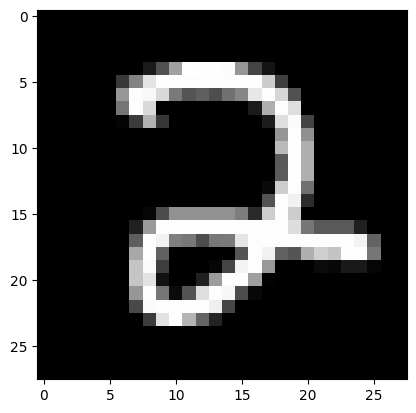

Prediction:  [6]
Label:  6


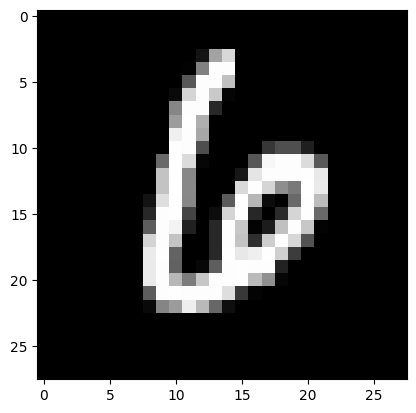

Prediction:  [4]
Label:  4


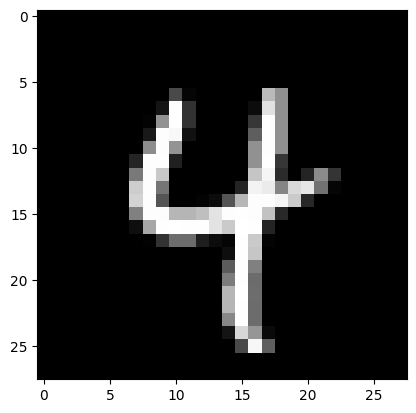

Prediction:  [3]
Label:  8


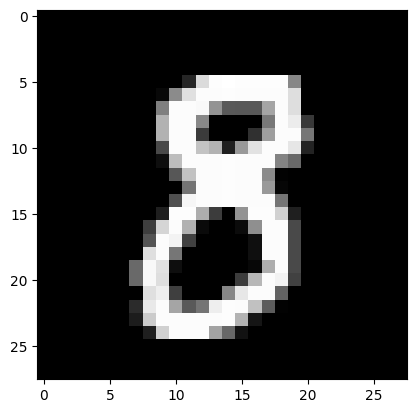

In [103]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [104]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 1 9 9 8 6 2 2 7 1 6 3 1 2 7 4 3 2 6 4 5 5 2 6 0 0 0 8 6 3 5 6 1 2 8 6 7
 8 6 1 9 7 0 6 8 3 4 2 7 8 4 3 3 7 1 2 2 2 9 6 6 0 5 8 2 8 4 3 9 3 9 4 2 8
 1 6 8 7 0 3 1 7 6 7 6 1 9 5 3 6 4 3 7 6 6 5 2 4 3 5 4 8 0 4 1 2 1 2 8 9 8
 1 4 7 1 0 3 6 9 2 1 9 7 3 9 6 5 7 1 0 6 5 6 4 2 0 9 9 9 4 2 3 6 4 0 7 4 1
 7 7 1 6 8 1 7 6 6 5 7 9 7 0 7 9 9 1 3 6 5 8 7 1 6 7 5 9 3 0 8 6 6 1 9 9 2
 3 7 2 6 6 2 8 9 6 6 7 4 5 5 6 3 1 5 3 7 9 9 0 7 4 7 5 1 1 0 2 5 3 8 1 3 9
 3 6 7 3 1 3 0 4 0 2 7 1 4 8 1 0 6 3 9 1 7 6 5 5 0 5 7 9 7 1 7 7 6 5 2 8 9
 5 2 6 4 1 8 8 0 6 5 9 5 6 6 6 1 0 6 3 1 9 4 0 6 3 4 7 7 2 3 1 8 2 6 1 5 1
 0 0 5 2 5 6 7 6 7 1 1 3 7 3 2 5 1 8 3 1 2 1 3 9 7 2 7 8 2 7 0 3 9 4 0 1 6
 9 2 6 2 8 3 0 3 3 0 7 0 0 6 8 7 4 7 1 8 1 0 5 6 1 5 7 3 9 9 3 2 3 8 9 2 1
 0 7 7 8 0 2 5 9 0 8 7 0 0 4 8 8 7 2 1 7 0 7 6 1 4 7 6 2 1 8 4 6 1 1 8 2 0
 8 4 9 3 1 7 4 1 2 7 9 7 4 1 6 0 4 0 3 2 3 0 7 9 8 6 8 4 1 8 5 8 6 0 9 6 6
 3 7 3 2 4 5 5 3 1 8 7 7 4 8 4 8 6 3 6 0 2 8 8 4 4 0 0 7 8 7 2 7 5 1 0 8 1
 3 0 1 3 1 1 6 6 2 1 7 2 

0.837